In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer


In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(714, 3)

In [6]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
885,0,39.0,29.1250
886,0,27.0,13.0000
887,1,19.0,30.0000
889,1,26.0,30.0000


In [7]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6293706293706294

In [8]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,scoring='accuracy'))

0.6218556091795528

In [9]:
kbin_age = KBinsDiscretizer(n_bins=20,encode = 'ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode = 'ordinal',strategy='quantile')

In [10]:
trf = ColumnTransformer([('first',kbin_age,[0]),
                        ('second',kbin_fare,[1])])

In [11]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [12]:
X_train_trf

array([[11.,  8.],
       [ 8.,  7.],
       [11.,  7.],
       ...,
       [15., 14.],
       [12.,  8.],
       [12.,  3.]])

In [13]:
X_test_trf

array([[16.,  6.],
       [ 0.,  8.],
       [10.,  9.],
       [ 7., 12.],
       [16.,  0.],
       [ 1., 11.],
       [12.,  7.],
       [18.,  8.],
       [ 9.,  3.],
       [ 6.,  3.],
       [ 2., 12.],
       [12.,  6.],
       [11., 12.],
       [14.,  3.],
       [13., 14.],
       [ 6.,  5.],
       [ 6.,  0.],
       [ 2., 12.],
       [ 9.,  6.],
       [18., 12.],
       [ 2., 11.],
       [18.,  9.],
       [ 1.,  7.],
       [13., 14.],
       [ 6.,  4.],
       [ 2.,  4.],
       [ 2.,  4.],
       [ 8.,  8.],
       [ 2.,  7.],
       [14.,  4.],
       [ 5.,  4.],
       [ 1., 11.],
       [14.,  9.],
       [13.,  0.],
       [14.,  3.],
       [14.,  7.],
       [13.,  9.],
       [18., 11.],
       [19., 11.],
       [18.,  1.],
       [ 1.,  8.],
       [ 4.,  3.],
       [14., 14.],
       [18.,  6.],
       [18., 13.],
       [10.,  5.],
       [13., 11.],
       [ 5., 11.],
       [15.,  0.],
       [17., 11.],
       [14., 12.],
       [ 7.,  6.],
       [ 9.,

In [14]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=20),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=15)}

In [15]:
trf.named_transformers_['first'].n_bins_

array([20])

In [16]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  4.  , 14.  , 18.  , 19.  , 21.  , 22.  , 24.  , 25.  ,
              27.  , 28.5 , 30.  , 32.  , 34.  , 36.  , 39.  , 42.  , 45.5 ,
              50.  , 57.5 , 80.  ])                                         ],
      dtype=object)

In [17]:
output = pd.DataFrame({
'age' :X_train['Age'],
'age_trf':X_train_trf[:,0],
'fare' :X_train[ 'Fare' ],
'fare_trf':X_train_trf[:,1]})


In [18]:
output

,age,age_trf,fare,fare_trf
328,31.0,11.0,20.5250,8.0
73,26.0,8.0,14.4542,7.0
253,30.0,11.0,16.1000,7.0
719,33.0,12.0,7.7750,2.0
666,25.0,8.0,13.0000,6.0
...,...,...,...,...
92,46.0,17.0,61.1750,12.0
134,25.0,8.0,13.0000,6.0
337,41.0,15.0,134.5000,14.0
548,33.0,12.0,20.5250,8.0


In [19]:
output['age_labels'] = pd.cut(x= X_train['Age'],bins = trf.named_transformers_['first'].bin_edges_[0].tolist())
output['Fare_labels'] = pd.cut(x= X_train['Fare'],bins = trf.named_transformers_['second'].bin_edges_[0].tolist())

In [20]:
output

,age,age_trf,fare,fare_trf,age_labels,Fare_labels
328,31.0,11.0,20.5250,8.0,"(30.0, 32.0]","(18.75, 26.0]"
73,26.0,8.0,14.4542,7.0,"(25.0, 27.0]","(13.0, 14.454]"
253,30.0,11.0,16.1000,7.0,"(28.5, 30.0]","(14.454, 18.75]"
719,33.0,12.0,7.7750,2.0,"(32.0, 34.0]","(7.25, 7.775]"
666,25.0,8.0,13.0000,6.0,"(24.0, 25.0]","(10.5, 13.0]"
...,...,...,...,...,...,...
92,46.0,17.0,61.1750,12.0,"(45.5, 50.0]","(51.479, 76.292]"
134,25.0,8.0,13.0000,6.0,"(24.0, 25.0]","(10.5, 13.0]"
337,41.0,15.0,134.5000,14.0,"(39.0, 42.0]","(108.9, 512.329]"
548,33.0,12.0,20.5250,8.0,"(32.0, 34.0]","(18.75, 26.0]"


In [21]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred1 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred1)

0.6433566433566433

In [22]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,scoring='accuracy'))

0.630276765488033

In [23]:
def discretize(bins, strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode = 'ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode = 'ordinal',strategy=strategy)
    
    trf = ColumnTransformer([('first',kbin_age,[0]),
                        ('second',kbin_fare,[1])])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,scoring='accuracy')))
    
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Age Before')
    
    plt.subplot(122)
    plt.hist(X_trf[:,0],color='r')
    plt.title('Age After')
    
    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title('Fare Before')
    
    plt.subplot(122)
    plt.hist(X_trf[:,1],color='g')
    plt.title('Fare After')
    
    plt.show()

0.6624642962671131


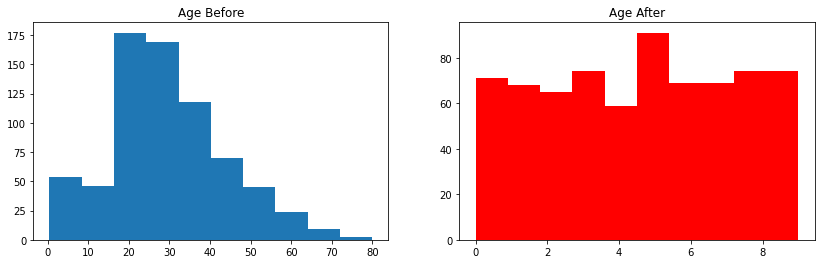

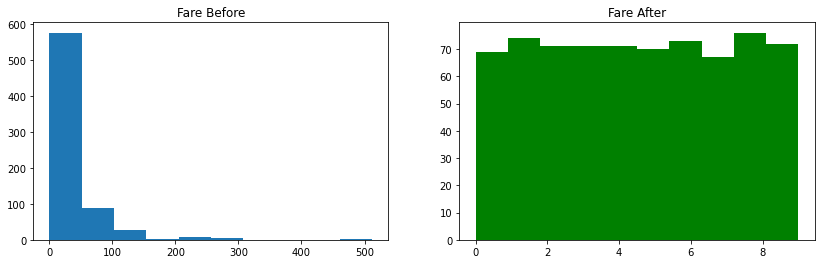

In [24]:
discretize(10,'quantile')

C:\Users\Nihar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Nihar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.6737614498177878


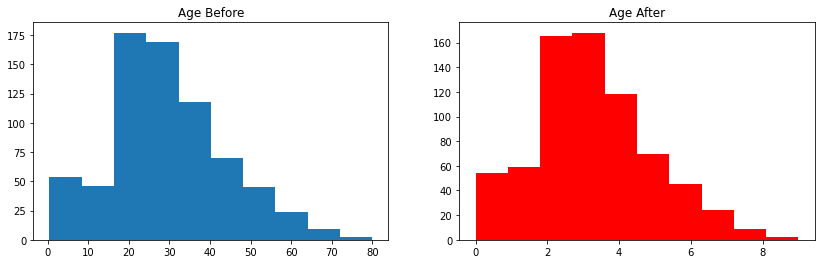

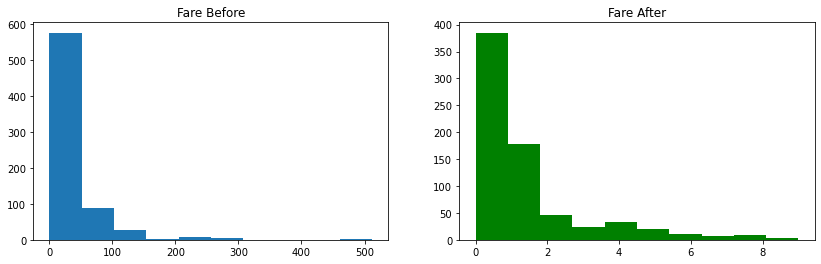

In [25]:
discretize(10,'kmeans')

0.6765488033093667


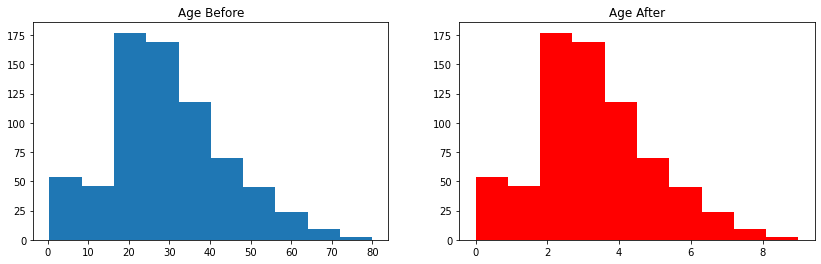

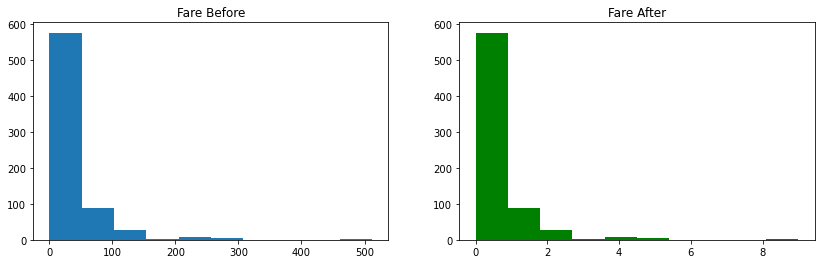

In [26]:
discretize(10,'uniform')

# Binarization

In [27]:
df1 = pd.read_csv('train.csv',usecols=['Age','Fare','SibSp','Parch','Survived'])

In [28]:
df1

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500
...,...,...,...,...,...
886,0,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,0,NaN,1,2,23.4500
889,1,26.0,0,0,30.0000


In [29]:
df1.dropna(inplace=True)

In [30]:
df1.shape

(714, 5)

In [31]:
df1['family'] = df1['SibSp']+df1['Parch']

df1.head()

,Survived,Age,SibSp,Parch,Fare,family
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,1
2,1,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,1
4,0,35.0,0,0,8.0500,0


In [32]:
df1.drop(columns=['SibSp','Parch'],inplace=True)

In [33]:
df1.head()

,Survived,Age,Fare,family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0


In [34]:
X = df1.drop(columns=['Survived'])
y = df1['Survived']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,scoring='accuracy')))

0.6223776223776224
0.6568403427558357


In [36]:
X_train

,Age,Fare,family
328,31.0,20.5250,2
73,26.0,14.4542,1
253,30.0,16.1000,1
719,33.0,7.7750,0
666,25.0,13.0000,0
...,...,...,...
92,46.0,61.1750,1
134,25.0,13.0000,0
337,41.0,134.5000,0
548,33.0,20.5250,2


In [37]:
# Applying Binarization

from sklearn.preprocessing import Binarizer

In [38]:
trf = ColumnTransformer([('bin',Binarizer(copy=False),['family'])],remainder='passthrough')

In [39]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [40]:
pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])


,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [41]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred = clf.predict(X_test_trf)

print(accuracy_score(y_test,y_pred))

X_trf = trf.fit_transform(X)
print(np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,scoring='accuracy')))

0.5874125874125874
0.6246626612823796
